# Función Griewank

Función tomada de la página [www.sfu.ca](https://www.sfu.ca/~ssurjano/griewank.html)

<img src="./images/Griewank.PNG">

es una función continua que tiene muchos mínimos locales que están distribuisoa de forma regular. 

Esta función usulmente se evalúo en el hipercubo $x_i$ perteneciente a $[-600, 600]$

la función Griewank tiene el mínimo global en el punto $f(x^*) = 0$ en $x^* \epsilon [0,...,0]$



In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numpy.linalg as ln
import pandas as pd
import scipy as sp
import scipy.optimize
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_colwidth = 300
from optimizador_BFGS import *

### Función caso 2 dimensiones

In [16]:
#Definición de la función
def f_griewank(x):
    """
    x es un array
    """
    return (((x[0]**2) + (x[1]**2))/4000) - (np.cos(x[0]/np.sqrt(2)))*(np.cos(x[1]/np.sqrt(2))) + 1

In [17]:
#ejemplo de evaluacion de la funcion Griewank en 2 dimensiones en el punto (1,1)
print (f_griewank([1.,1.]))

0.4225281526173127


### Función caso de N dimensiones

In [18]:
def fN_griewank(x):
    """
    x es un array
    """
    n = len(x)
    suma1 = (np.sum(np.power(x,2)))/4000
    prod2 = np.prod(np.cos(x / np.sqrt(n)))
    funcion = suma1 - prod2 + 1
    
    return funcion  

In [19]:
print (fN_griewank([1,1]))

0.4225281526173127


Se observa que el resultado para el caso N=2 es igual a la implementación para 2 dimensiones. A continuación se realizan las gráficas de contorno y de la función

#### Gráfica de contorno de la función Griewank de dos dimensiones

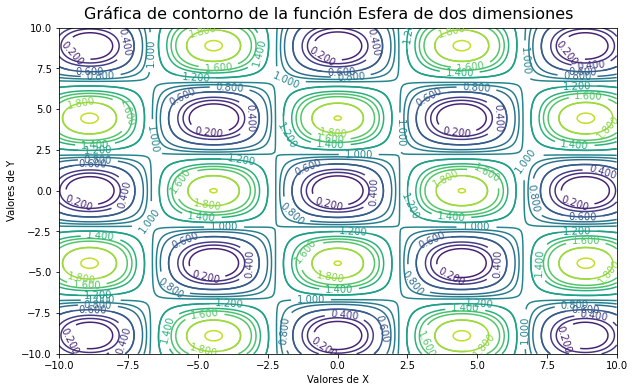

In [20]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

x = y = np.linspace(-10, 10, 200)
X,Y = np.meshgrid(x,y)
Z = f_griewank([X,Y])
cs = ax.contour(X, Y, Z, 12) #numero de niveles del contorno
ax.clabel(cs, fontsize=10) #valores de Z

#plt.title('Gráfica de contorno de la función Griewank de dos dimensiones')
plt.figtext(.5,.9,'Gráfica de contorno de la función Griewank de dos dimensiones', fontsize=16, ha='center')
plt.xlabel('Valores de X')
plt.ylabel('Valores de Y')

cs = ax.contour(X,Y,Z)
plt.show()

Text(0.5, 0.9, 'Gráfica de superficie de la función Esfera de dos dimensiones')

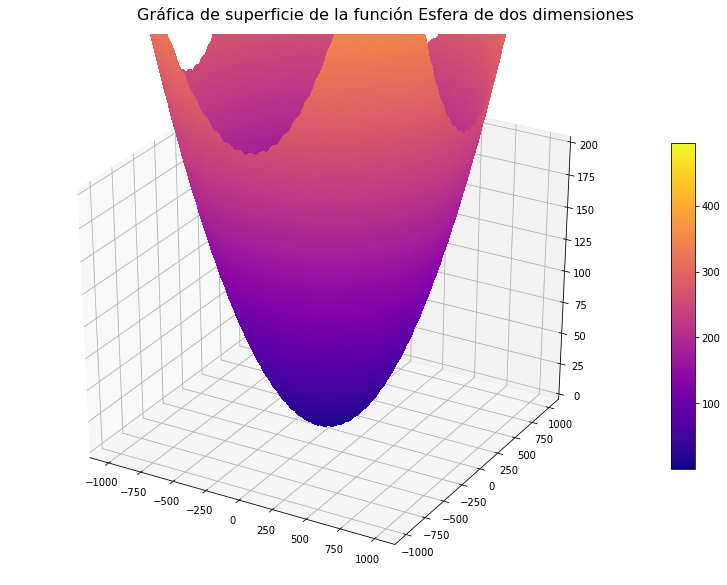

In [23]:
from matplotlib import cm

fig = plt.figure(figsize=(14,10))
ax = plt.axes(projection='3d')


x = y = np.linspace(-1000, 1000, 200)
X,Y = np.meshgrid(x,y)
Z = f_griewank([X,Y])
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap=cm.plasma,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 200)
fig.colorbar(surf, shrink=0.6, aspect=14)
plt.figtext(.5,.9,'Gráfica de superficie de la función griewank de dos dimensiones', fontsize=16, ha='center')

Text(0.5, 0.9, 'Gráfica de superficie de la función griewank de dos dimensiones')

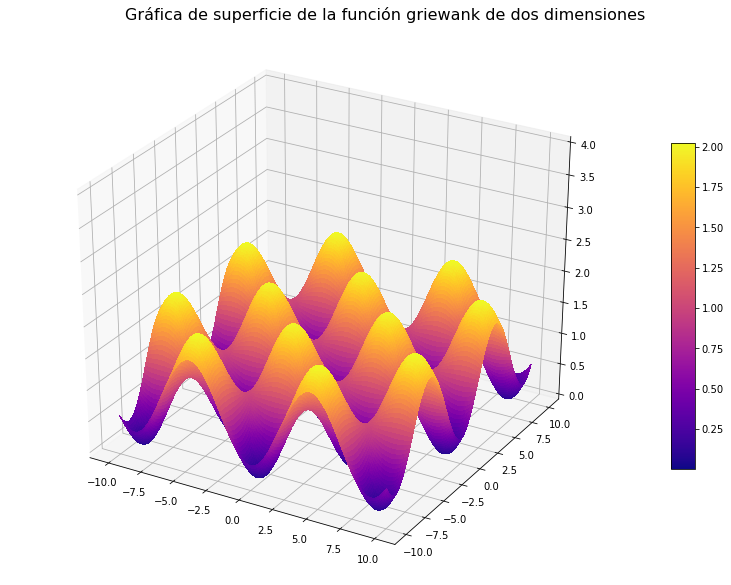

In [25]:
from matplotlib import cm

fig = plt.figure(figsize=(14,10))
ax = plt.axes(projection='3d')


x = y = np.linspace(-10, 10, 200)
X,Y = np.meshgrid(x,y)
Z = f_griewank([X,Y])
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap=cm.plasma,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 4)
fig.colorbar(surf, shrink=0.6, aspect=14)
plt.figtext(.5,.9,'Gráfica de superficie de la función griewank de dos dimensiones', fontsize=16, ha='center')

### Optimización con nuestra implementacion del algoritmo BFGS dela función Griewank - Dimensión 2

In [42]:
X0 = [100.,100]
var_sensibilidad  = np.around(np.linspace(0.01, 2, num=25, endpoint=True), decimals=3).tolist()

In [43]:
Griewank_min, Griewank_max, Griewank_prom, Griewank_med, datos = evaluador(fN_griewank, X0, var_sensibilidad)

In [44]:
print (f"El minimo de los minimos del valor de la función en las 25 optimizaciones es: {Griewank_min}")
print ("El minimo de los minimos del valor de la función en las 25 optimizaciones es: {}".format(Griewank_max))
print ("El promedio de los minimos de la función en las 25 optimizaciones es: " + str(Griewank_prom))
print ((f"La mediana del minimo del valor de la función en las 25 optimizaciones es: {Griewank_med}"))
datos

El minimo de los minimos del valor de la función en las 25 optimizaciones es: 6.001398343505283
El minimo de los minimos del valor de la función en las 25 optimizaciones es: 6.001497121526553
El promedio de los minimos de la función en las 25 optimizaciones es: 6.00145855202125
La mediana del minimo del valor de la función en las 25 optimizaciones es: 6.001465701426408


,Paso,Iteraciones para convergencia,gradiente en el minimo,F(X) en el minimo,Coordenadas
0,0.010,153,0.009910,6.001398,"[100.05114096980068, 100.05114096980068]"
1,0.093,17,0.009184,6.001412,"[100.05217655268596, 100.05217655268596]"
2,0.176,9,0.008908,6.001417,"[100.05257106014702, 100.05257106014702]"
3,0.259,6,0.008945,6.001417,"[100.05251700416474, 100.05251700416474]"
4,0.342,5,0.007158,6.001446,"[100.05506893602319, 100.05506893602319]"
5,0.425,4,0.006905,6.001449,"[100.05542934171216, 100.05542934171216]"
6,0.507,3,0.008378,6.001427,"[100.05332767154765, 100.05332767154765]"
7,0.590,3,0.005490,6.001467,"[100.05745038043169, 100.05745038043169]"
8,0.673,3,0.003304,6.001486,"[100.06057517248198, 100.06057517248198]"
9,0.756,2,0.007055,6.001447,"[100.0552151938439, 100.0552151938439]"


### Optimización con nuestra implementacion del algoritmo BFGS dela función Griewank - Dimensión 5

In [36]:
X0 = [100.,100., 100., 100., 100.]
var_sensibilidad  = np.around(np.linspace(0.01, 2, num=25, endpoint=True), decimals=3).tolist()

In [37]:
Griewank_min, Griewank_max, Griewank_prom, Griewank_med, datos = evaluador(fN_griewank, X0, var_sensibilidad)

In [38]:
print (f"El minimo de los minimos del valor de la función en las 25 optimizaciones es: {Griewank_min}")
print ("El minimo de los minimos del valor de la función en las 25 optimizaciones es: {}".format(Griewank_max))
print ("El promedio de los minimos de la función en las 25 optimizaciones es: " + str(Griewank_prom))
print ((f"La mediana del minimo del valor de la función en las 25 optimizaciones es: {Griewank_med}"))
datos

El minimo de los minimos del valor de la función en las 25 optimizaciones es: 1.8160602412220506e-05
El minimo de los minimos del valor de la función en las 25 optimizaciones es: 71.12600316506796
El promedio de los minimos de la función en las 25 optimizaciones es: 15.84051819175939
La mediana del minimo del valor de la función en las 25 optimizaciones es: 12.059779523477994


,Paso,Iteraciones para convergencia,gradiente en el minimo,F(X) en el minimo,Coordenadas
0,0.010,259,0.009948,15.507559,"[107.3282064640126, 107.3282064640126, 107.32820646391482, 107.32820646396026, 107.32820646776031]"
1,0.093,52,0.009405,15.914107,"[105.61665290242728, 105.61665290242728, 105.61665290242723, 105.61665290242686, 105.61665290242696]"
2,0.176,36,0.005104,71.109974,"[-238.04326364224258, -238.04326364253563, -238.04326364256787, -238.04326364086978, -238.04326364274377]"
3,0.259,31,0.009356,54.016058,"[204.2753941627846, 204.2753941627846, 204.27539416279333, 204.27539416279302, 204.27539416277494]"
4,0.342,14,0.008594,12.507777,"[96.25258669313143, 96.25258669313143, 96.25258669313143, 96.2525866931254, 96.25258669312781]"
5,0.425,15,0.009560,12.451058,"[91.57495934106703, 91.57495934106703, 91.57495934106703, 91.57495934105623, 91.57495934105616]"
6,0.507,19,0.005616,11.981445,"[93.36751329114526, 93.36751329114526, 93.36751329114296, 93.36751329113099, 93.36751329113166]"
7,0.590,31,0.004975,7.008946,"[63.366968893310585, 63.36696889331535, 63.366968893315345, 63.36696889329587, 63.36696889510281]"
8,0.673,50,0.004953,30.004129,"[152.7871765112514, 152.78717651124933, 152.78717651058375, 152.7871764946571, 152.7871764961832]"
9,0.756,10,0.007455,12.059780,"[98.10805449873966, 98.10805449873966, 98.10805449874158, 98.10805449873924, 98.10805449873918]"


### Optimización con nuestra implementacion del algoritmo BFGS dela función Griewank - Dimensión 10

In [45]:
X0 = [100.,100., 100., 100., 100., 100., 100., 100., 100., 100.]
var_sensibilidad  = np.around(np.linspace(0.01, 2, num=25, endpoint=True), decimals=3).tolist()

In [46]:
Griewank_min, Griewank_max, Griewank_prom, Griewank_med, datos = evaluador(fN_griewank, X0, var_sensibilidad)

In [47]:
print (f"El minimo de los minimos del valor de la función en las 25 optimizaciones es: {Griewank_min}")
print ("El minimo de los minimos del valor de la función en las 25 optimizaciones es: {}".format(Griewank_max))
print ("El promedio de los minimos de la función en las 25 optimizaciones es: " + str(Griewank_prom))
print ((f"La mediana del minimo del valor de la función en las 25 optimizaciones es: {Griewank_med}"))
datos

El minimo de los minimos del valor de la función en las 25 optimizaciones es: 1.0359069329528487
El minimo de los minimos del valor de la función en las 25 optimizaciones es: 29.693304620387323
El promedio de los minimos de la función en las 25 optimizaciones es: 16.876625479792043
La mediana del minimo del valor de la función en las 25 optimizaciones es: 24.542581179423433


,Paso,Iteraciones para convergencia,gradiente en el minimo,F(X) en el minimo,Coordenadas
0,0.010,395,0.009926,24.542948,"[98.81246451175099, 98.81246451175099, 98.80999100881084, 98.81252599898544, 98.81154247815462, 98.81154510710799, 98.81002245329034, 98.81271783226615, 98.81706186965025, 98.80994668316681]"
1,0.093,37,0.009444,24.542886,"[98.80975078221901, 98.80975078221901, 98.80975078221901, 98.80975078221901, 98.80975078221901, 98.80975078221866, 98.80975078221901, 98.80975078221901, 98.80975078222292, 98.80975078221465]"
2,0.176,19,0.009145,24.542850,"[98.80828174135803, 98.80828174135803, 98.80828174135803, 98.80828174135803, 98.8082817413544, 98.80828174135513, 98.80828174135513, 98.8082817413544, 98.80828174135533, 98.80828174135705]"
3,0.259,12,0.009871,24.542941,"[98.8118393313536, 98.8118393313536, 98.81183933135398, 98.81183933135398, 98.81183933135398, 98.81183933135398, 98.81183933135398, 98.81183933135398, 98.81183933135257, 98.81183933135205]"
4,0.342,9,0.007800,24.542700,"[98.80161992729064, 98.80161992729064, 98.80161992729151, 98.80161992729064, 98.80161992729151, 98.80161992729151, 98.80161992729064, 98.80161992729107, 98.80161992729107, 98.80161992729192]"
5,0.425,6,0.009366,24.542877,"[98.80936465332341, 98.80936465332341, 98.80936465332341, 98.80936465332341, 98.80936465332341, 98.80936465332341, 98.80936465332341, 98.80936465332341, 98.80936465332341, 98.80936465332341]"
6,0.507,4,0.006501,24.542581,"[98.79511026339686, 98.79511026339686, 98.79511026339686, 98.79511026339686, 98.79511026339686, 98.79511026339686, 98.79511026339686, 98.79511026339686, 98.79511026339686, 98.79511026339686]"
7,0.590,4,0.003796,24.542597,"[98.74014728657542, 98.74014728657542, 98.74014728657542, 98.74014728657542, 98.74014728657542, 98.74014728657542, 98.74014728657542, 98.74014728657542, 98.74014728657542, 98.74014728657482]"
8,0.673,5,0.001718,24.542367,"[98.77037241055254, 98.77037241055254, 98.77037241055254, 98.77037241055254, 98.77037241055254, 98.77037241055254, 98.77037241055254, 98.77037241055254, 98.77037241055261, 98.77037241055163]"
9,0.756,9,0.001653,24.624384,"[97.80288944581046, 97.80288944581046, 97.80288944581046, 97.80288944581046, 97.80288944581046, 97.80288944581046, 97.80288944581046, 97.80288944581046, 97.80288944581046, 97.80288944581046]"


## Caso con puntos de inicio aleatorios

In [64]:
#generadion de punto aleatoria para 2, 5, y 10 dimensiones
np.random.seed(seed=1)

In [48]:
X0_2 = np.random.uniform(low=-100, high=100, size=2)
X0_2

array([-92.51584053, -44.05869314])

In [49]:
X0_5 = np.random.uniform(low=-100, high=100, size=5)
X0_5

array([37.38628217, 28.51105169, 22.19207024, 85.43915952, -6.80640755])

In [50]:
X0_10 = np.random.uniform(low=-100, high=100, size=10)
X0_10

array([-35.31274563, -12.754513  ,  74.22460772,  18.43137252,
       -10.55967653, -20.42951764,  80.45245091, -58.40260833,
        86.51225303, -54.74778498])

In [51]:
var_sensibilidad  = np.around(np.linspace(0.01, 2, num=25, endpoint=True), decimals=3).tolist()

In [52]:
#caso de 2 dimensions, inicio aleatorio

Griewank_min, Griewank_max, Griewank_prom, Griewank_med, datos = evaluador(fN_griewank, X0_2, var_sensibilidad)
print (f"El minimo de los minimo valor de la función en las 25 optimizaciones es: {Griewank_min}")
print ("El minimo de los minimo valor de la función en las 25 optimizaciones es: {}".format(Griewank_max))
print ("El promedio de los minimos de la función en las 25 optimizaciones es: " + str(Griewank_prom))
print ((f"La mediana del minimo del valor de la función en las 25 optimizaciones es: {Griewank_med}"))
datos

El minimo de los minimo valor de la función en las 25 optimizaciones es: 4.669403211390223
El minimo de los minimo valor de la función en las 25 optimizaciones es: 4.672401331215795
El promedio de los minimos de la función en las 25 optimizaciones es: 4.672237406153602
La mediana del minimo del valor de la función en las 25 optimizaciones es: 4.672376659458356


,Paso,Iteraciones para convergencia,gradiente en el minimo,F(X) en el minimo,Coordenadas
0,0.010,379,0.009916,4.672357,"[-93.38083068071101, -44.47037778475985]"
1,0.093,40,0.009258,4.672365,"[-93.38200713302507, -44.47098393609343]"
2,0.176,20,0.009849,4.672357,"[-93.38086504872959, -44.47063688512508]"
3,0.259,13,0.009911,4.672356,"[-93.38066254982056, -44.47079714875673]"
4,0.342,10,0.007681,4.672380,"[-93.38470082398894, -44.472756835932685]"
5,0.425,8,0.006250,4.672391,"[-93.38727717219625, -44.474073565730876]"
6,0.507,6,0.007753,4.672379,"[-93.38439510050189, -44.47316426192884]"
7,0.590,5,0.006389,4.672390,"[-93.38693533073699, -44.47419895782663]"
8,0.673,4,0.006158,4.672391,"[-93.38744881478624, -44.47414046048723]"
9,0.756,3,0.006419,4.672391,"[-93.3872200231215, -44.47329679275077]"


In [53]:
#caso de 5 dimensions, inicio aleatorio

Griewank_min, Griewank_max, Griewank_prom, Griewank_med, datos = evaluador(fN_griewank, X0_5, var_sensibilidad)
print (f"El minimo de los minimo valor de la función en las 25 optimizaciones es: {Griewank_min}")
print ("El minimo de los minimo valor de la función en las 25 optimizaciones es: {}".format(Griewank_max))
print ("El promedio de los minimos de la función en las 25 optimizaciones es: " + str(Griewank_prom))
print ((f"La mediana del minimo del valor de la función en las 25 optimizaciones es: {Griewank_med}"))
datos

El minimo de los minimo valor de la función en las 25 optimizaciones es: 0.9109935005146761
El minimo de los minimo valor de la función en las 25 optimizaciones es: 32222.319920014423
El promedio de los minimos de la función en las 25 optimizaciones es: 3061.8007308987762
La mediana del minimo del valor de la función en las 25 optimizaciones es: 3.7412667916335396


,Paso,Iteraciones para convergencia,gradiente en el minimo,F(X) en el minimo,Coordenadas
0,0.010,306,0.009981,4.411590,"[35.24143019564177, 28.174580560424577, 21.14808067673008, 84.53022365670468, -7.0420993249969905]"
1,0.093,72,0.009919,2.289297,"[28.02285840588385, 28.005964453616325, 20.975395215986115, 84.07674274072612, -7.03331902400042]"
2,0.176,76,0.009252,3.059610,"[25.793476317078607, 25.598896664461602, 18.450889636729347, 81.20553879798439, -6.927476063065835]"
3,0.259,47,0.007893,2.141439,"[21.044093990607834, 28.031312480421168, 13.991077119682327, 84.09152568250363, -7.030336380788934]"
4,0.342,28,0.009097,4.238406,"[28.153062692862534, 28.20747855284323, 14.08166993100621, 84.50851611055425, -7.059406838978834]"
5,0.425,128,0.009096,6.227049,"[-77.06933712569828, -28.04445390955312, 84.05605916712156, 84.10883206277443, -63.04860432160793]"
6,0.507,22,0.007916,2.684071,"[23.553881377648956, 22.605110302335916, 45.01964280944517, 59.295475184343545, -8.849893131373625]"
7,0.590,37,0.005813,3.694296,"[14.076254040087663, 63.34998639691496, 28.169214228796815, -42.25072880903071, -0.0061706002600923765]"
8,0.673,522,0.009983,4.065156,"[-7.059418140065643, -28.149185245114484, -70.4288838800684, 49.251688369708376, 7.029962532060904]"
9,0.756,305,0.009733,2.781387,"[7.030657918823044, -77.08265209673098, 14.033360629930469, 0.018728506357210663, -70.0979533073425]"


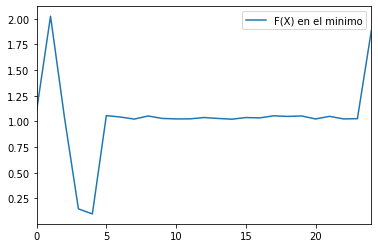

In [64]:
datos[['F(X) en el minimo']].plot()

In [65]:
#caso de 10 dimensions, inicio aleatorio

Griewank_min, Griewank_max, Griewank_prom, Griewank_med, datos = evaluador(fN_griewank, X0_10, var_sensibilidad)
print (f"El minimo de los minimo valor de la función en las 25 optimizaciones es: {Griewank_min}")
print ("El minimo de los minimo valor de la función en las 25 optimizaciones es: {}".format(Griewank_max))
print ("El promedio de los minimos de la función en las 25 optimizaciones es: " + str(Griewank_prom))
print ((f"La mediana del minimo del valor de la función en las 25 optimizaciones es: {Griewank_med}"))
datos

El minimo de los minimo valor de la función en las 25 optimizaciones es: 0.09846613720688824
El minimo de los minimo valor de la función en las 25 optimizaciones es: 2.024422526059603
El promedio de los minimos de la función en las 25 optimizaciones es: 1.0394714524362088
La mediana del minimo del valor de la función en las 25 optimizaciones es: 1.0374198032456892


,Paso,Iteraciones para convergencia,gradiente en el minimo,F(X) en el minimo,Coordenadas
0,0.010,843,0.009981,1.102637,"[-0.2522625628854385, -2.3842009704769627, 6.2797967929400365, 4.936576546391983, -4.063171175576618, 2.2182191126854787, 5.377382191134294, -6.322830263913686, 10.057949973683527, -12.223278478840552]"
1,0.093,184,0.009428,2.024423,"[0.054626944856825704, 0.011472140753416524, -9.956136004721076, -0.023334327408082712, 0.005055992978665821, 0.016877332523697722, 0.00780761763120115, -0.03411793056541801, 0.015648395939384024, 0.036093251497912635]"
2,0.176,22,0.006292,1.037799,"[-2.5778749952363245, -0.576709643915687, 3.6126083252672285, 1.5007420385860133, -0.5847663426141878, -1.4199294423366613, 5.531565341782342, -4.700575000327388, 5.932944181669533, -6.104571926926169]"
3,0.259,96,0.009438,0.147728,"[-9.881296511250648, 0.02421666709385477, 9.87799348932535, -0.038680002453742694, 0.023775425518444717, -0.023899770389541775, 9.847393034720897, -9.867094238253623, 9.94297882798123, -9.884566804861398]"
4,0.342,53,0.006803,0.098466,"[-0.034972717643857135, 0.00664284236722185, -9.888854446927834, -0.031556146236130164, 0.012468993108506736, 0.014044710441175659, -9.9013233276433, 9.852550454208926, -9.91033498490033, 0.024747576549075077]"
5,0.425,9,0.008448,1.056131,"[-3.5040996501381105, -0.9777234338337847, 5.24454502350814, 1.6533650559702182, -0.8740068253544822, -1.7223355492359493, 6.800337317194019, -4.989421355579328, 7.509282005245919, -7.043571647904627]"
6,0.507,9,0.007359,1.042669,"[-3.201220714749282, -0.8110795183234548, 4.029016288168119, 1.4726721489014245, -0.7679134970424557, -1.5139779376181592, 5.809059646619351, -4.249462550042237, 6.34790286088088, -6.423188764795251]"
7,0.590,8,0.009620,1.022425,"[1.195596924954902, 0.8030508695299071, -5.378856580669028, -0.7828578644591982, 0.5611898062329603, 1.0581106008772463, -4.212420861695142, 2.9855928987527354, -4.378410970607896, 0.14619266020894103]"
8,0.673,4,0.006904,1.052707,"[-3.489437543332773, -0.9327355016226537, 4.8503831586423924, 1.566647528705008, -0.8568281433337195, -1.6742971381218665, 6.609232547000005, -4.869749606846151, 7.271918665028073, -6.907522090107312]"
9,0.756,7,0.008521,1.028773,"[1.5652725830042231, 0.9435256618224839, -6.166328116791985, -1.0960022433574585, 0.6847792238094466, 1.309481900537444, -5.121761129275681, 3.6280495502745915, -5.314980716538837, 0.6668191577858766]"
